In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('retail_sales_dataset.csv')

In [4]:
data = data[['Age', 'Gender', 'Product Category', 'Total Amount']]

In [5]:
le_gender = LabelEncoder()
le_product_category = LabelEncoder()


In [6]:
data['Gender'] = le_gender.fit_transform(data['Gender'])  # Male = 1, Female = 0
data['Product Category'] = le_product_category.fit_transform(data['Product Category'])

In [7]:
data['High_Spend'] = np.where(data['Total Amount'] > 500, 1, 0)

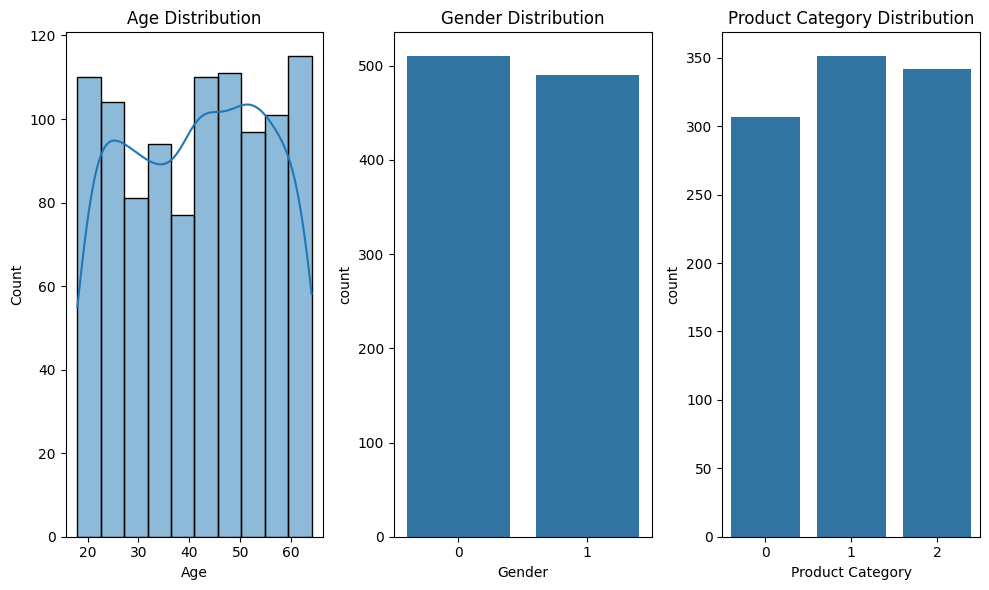

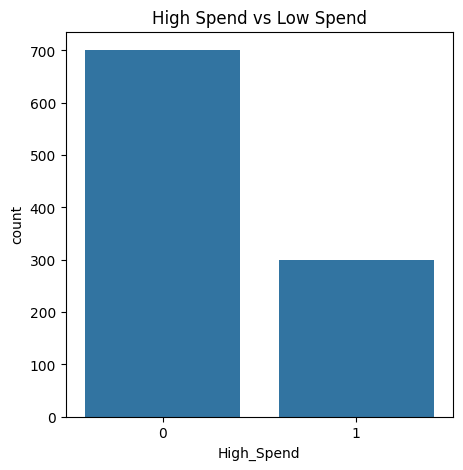

In [8]:
# Visualize distribution of features
plt.figure(figsize=(10, 6))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')

# Gender distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

# Product Category distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Product Category', data=data)
plt.title('Product Category Distribution')

plt.tight_layout()
plt.show()

# Visualize class imbalance
plt.figure(figsize=(5, 5))
sns.countplot(x='High_Spend', data=data)
plt.title('High Spend vs Low Spend')
plt.show()

In [ ]:
X = data.drop(['Total Amount', 'High_Spend'], axis=1)
y = data['High_Spend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4260 - loss: 0.7123 - val_accuracy: 0.6857 - val_loss: 0.6482
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7103 - loss: 0.6389 - val_accuracy: 0.6857 - val_loss: 0.6145
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7276 - loss: 0.5924 - val_accuracy: 0.6857 - val_loss: 0.6171
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6841 - loss: 0.6186 - val_accuracy: 0.6857 - val_loss: 0.6273
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6886 - loss: 0.6100 - val_accuracy: 0.6857 - val_loss: 0.6321
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7190 - loss: 0.5882 - val_accuracy: 0.6857 - val_loss: 0.6314
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7133 - loss: 0.5870 - val_accuracy: 0.6857 - val_loss: 0.6364
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7041 - loss: 0.6044 - val_accuracy: 0.6857 - val_los

In [ ]:

# Step 7: Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7033333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83       211
           1       0.00      0.00      0.00        89

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



In [ ]:
new_data = np.array([[30, 1, le_product_category.transform(['Electronics'])[0]]])  # Male = 1
new_data_scaled = scaler.transform(new_data)

# Make prediction
new_prediction = model.predict(new_data_scaled)
predicted_class = (new_prediction > 0.5).astype("int32")

print(f"\nPrediction for new data (Age: 30, Gender: Male, Product Category: Electronics): {'High Spend' if predicted_class[0][0] == 1 else 'Low Spend'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Prediction for new data (Age: 30, Gender: Male, Product Category: Electronics): Low Spend


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
